In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
original = {}
TotalPositive = 0
TotalNegative = 0
with open('data.class','r') as f:
    f = f.readlines()
    for line in f:
        line = line.split()
        if line[1]=='T':
            original[line[0]]=True 
            TotalPositive+=1
        else:
            original[line[0]]=False 
            TotalNegative+=1
roc1=[]
with open('roc1.txt','r') as f:
    f = f.readlines()
    for line in f:
        roc1.append(line.strip())
roc2=[]
with open('roc2.txt','r') as f:
    f = f.readlines()
    for line in f:
        roc2.append(line.strip())
roc3=[]
with open('roc3.txt','r') as f:
    f = f.readlines()
    for line in f:
        roc3.append(line.strip())
roc4=[]
with open('roc4.txt','r') as f:
    f = f.readlines()
    for line in f:
        roc4.append(line.strip())

In [3]:
def GetTPFP(k,dataset):
    TP=0
    FP=0
    TN=0
    FN=0
    for i in range (3000):
        #Identified True
        if i<k:
            TP+=original[dataset[i]]
        else:
            TN+=original[dataset[i]]
    #(TP,FP,TN,FN)
    #(F11,F01,F10,F00)
    #return (TP,TotalPositive-TP,TN,TotalNegative-TN)
    return (float (TP)/float(TotalPositive),float(k-TP)/float(TotalNegative))
        

In [4]:
roc1cm=[]
roc2cm=[]
roc3cm=[]
roc4cm=[]
print 'processing roc1'
for i in range (3000):
    roc1cm.append(GetTPFP(i,roc1))
print 'processing roc2'
for i in range (3000):
    roc2cm.append(GetTPFP(i,roc2))
print 'processing roc3'
for i in range (3000):
    roc3cm.append(GetTPFP(i,roc3))
print 'processing roc4'
for i in range (3000):
    roc4cm.append(GetTPFP(i,roc4))
print 'Finished'

processing roc1
processing roc2
processing roc3
processing roc4
Finished


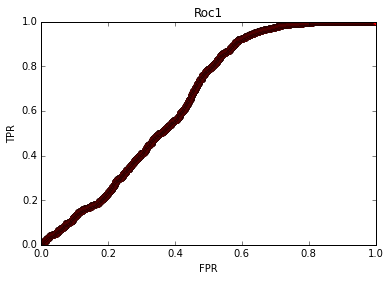

In [87]:
plt.figure('roc1.jpg')
plt.plot([x[1] for x in roc1cm],[x[0] for x in roc1cm], 'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Roc1')
#plt.show()
plt.savefig('roc1.jpg')

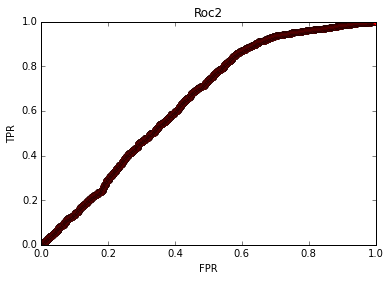

In [86]:
plt.figure('roc2.jpg')
plt.plot([x[1] for x in roc2cm],[x[0] for x in roc2cm], 'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Roc2')
#plt.show()
plt.savefig('roc2.jpg')

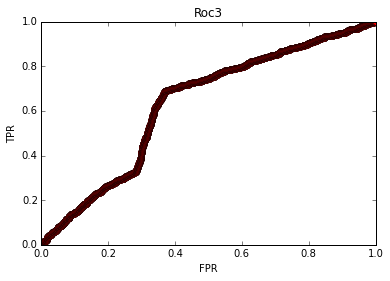

In [85]:
plt.figure('roc3.jpg')
plt.plot([x[1] for x in roc3cm],[x[0] for x in roc3cm], 'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Roc3')
#plt.show()
plt.savefig('roc3.jpg')

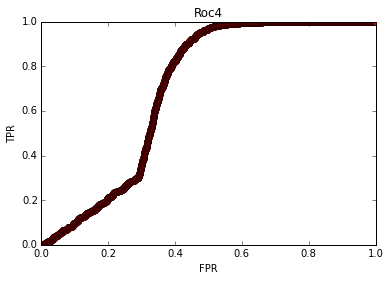

In [82]:
plt.figure('roc4.jpg')
plt.plot([x[1] for x in roc4cm],[x[0] for x in roc4cm], 'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Roc4')
#plt.show()
plt.savefig('roc4.jpg')

In [8]:
AUCROC1 = sum([x[0] for x in roc1cm])
AUCROC2 = sum([x[0] for x in roc2cm])
AUCROC3 = sum([x[0] for x in roc3cm])
AUCROC4 = sum([x[0] for x in roc4cm])
print AUCROC1/3000,AUCROC2/3000,AUCROC3/3000,AUCROC4/3000

0.589976131687 0.587792866941 0.577493004115 0.617289437586


In [14]:
def FindK(dataset):
    k=0
    lst=[]
    for i in range (3000):
        lst.append(i,dataset[i][0]-dataset[i][1])
    print lst[10]

In [ ]:
FindK(